# Import modules

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [218]:
df = pd.read_excel('bank-additional.xlsx')
df.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8         92893.0          -46.2     1313.0       5099.1  no  
1          1.1         93994.0          -36.4     4855.0       5191.0  no  
2          1.4         94465.0          -41.8     4962.0       5228.1  no  
3          1.4         94465.0          -41.8     4959.0       5228.1  no  
4         -0.1            93.2          -42.0     4191.0       5195.8  no  

[5 rows x 21 columns]

In [63]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
# Null Value in percentage
df.isnull().sum()/df.shape[0]*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [49]:
# find unique values
df.apply(lambda x: len(x.unique()))

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

# Exploratory Data Analysis

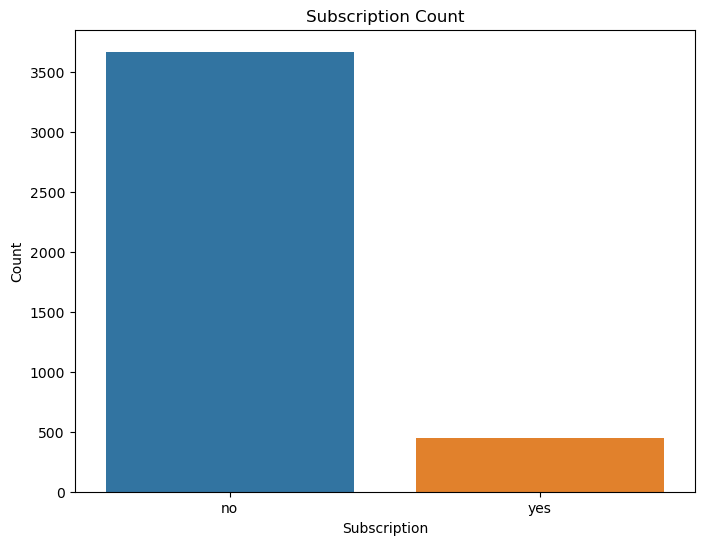

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.title('Subscription Count')
plt.show()


<AxesSubplot:xlabel='age', ylabel='count'>

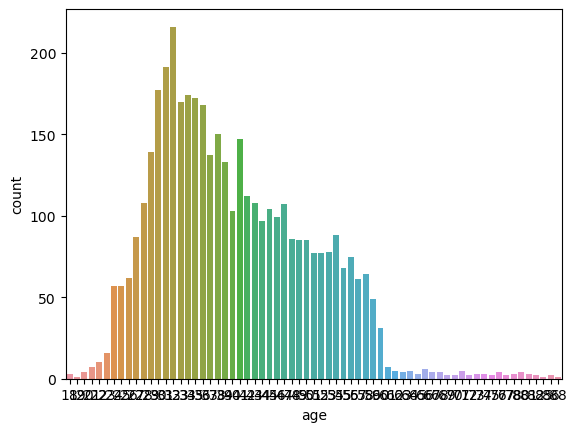

In [8]:
sns.countplot(df['age'])

<AxesSubplot:xlabel='marital', ylabel='count'>

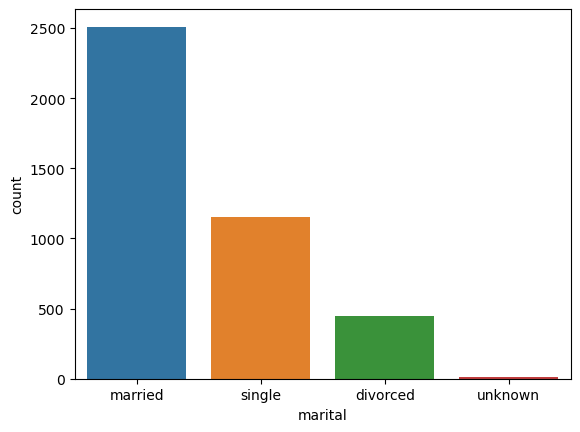

In [9]:
sns.countplot(df['marital'])

<AxesSubplot:xlabel='education', ylabel='count'>

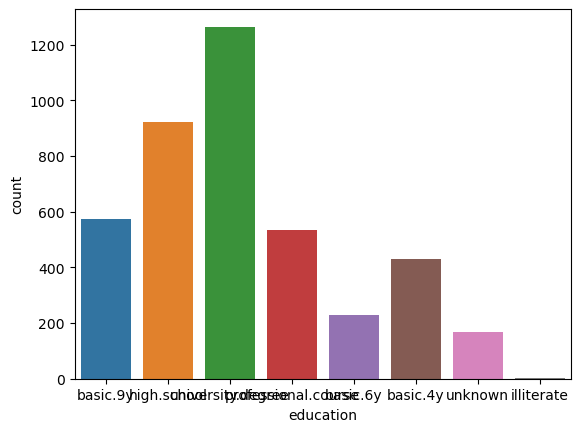

In [10]:
sns.countplot(df['education'])

<AxesSubplot:xlabel='default', ylabel='count'>

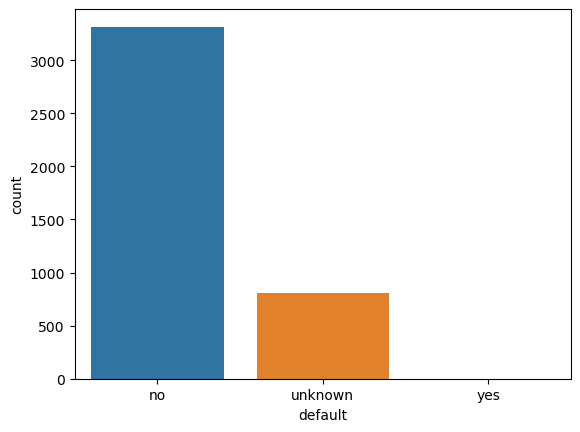

In [11]:
sns.countplot(df['default'])

<AxesSubplot:xlabel='housing', ylabel='count'>

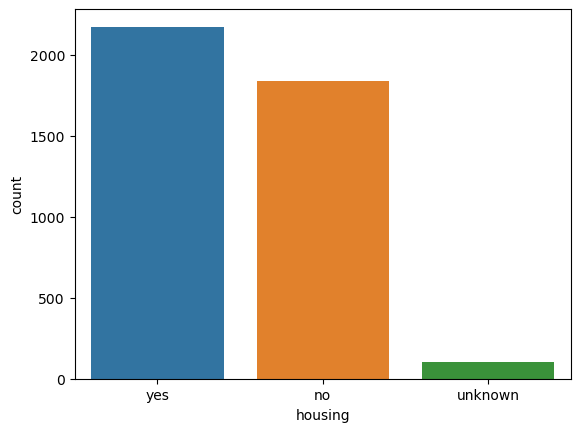

In [12]:
sns.countplot(df['housing'])

<AxesSubplot:xlabel='loan', ylabel='count'>

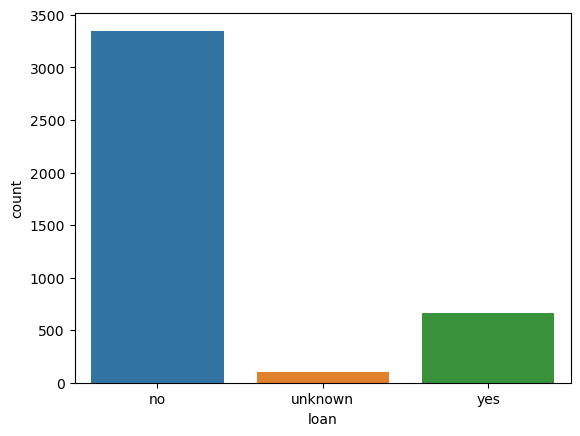

In [13]:
sns.countplot(df['loan'])

<AxesSubplot:xlabel='contact', ylabel='count'>

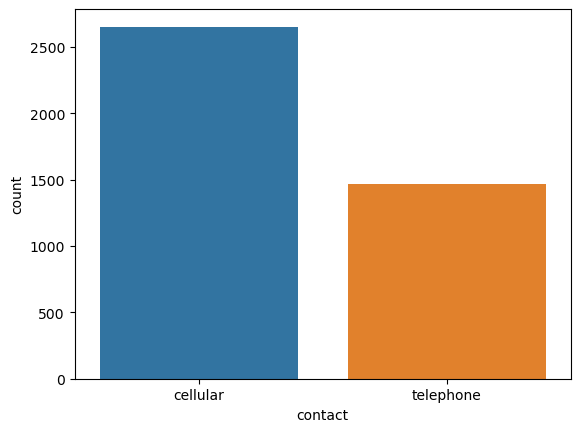

In [14]:
sns.countplot(df['contact'])

<AxesSubplot:xlabel='month', ylabel='count'>

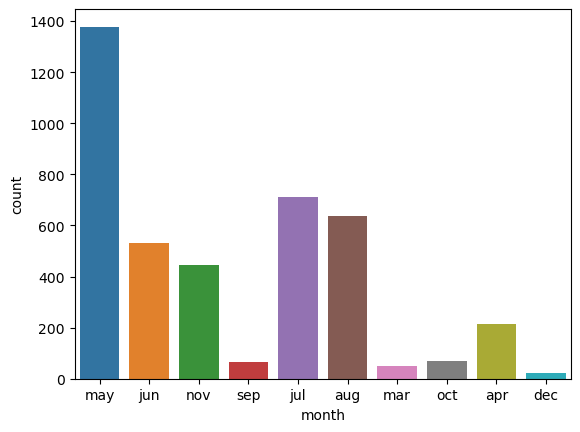

In [15]:
sns.countplot(df['month'])

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

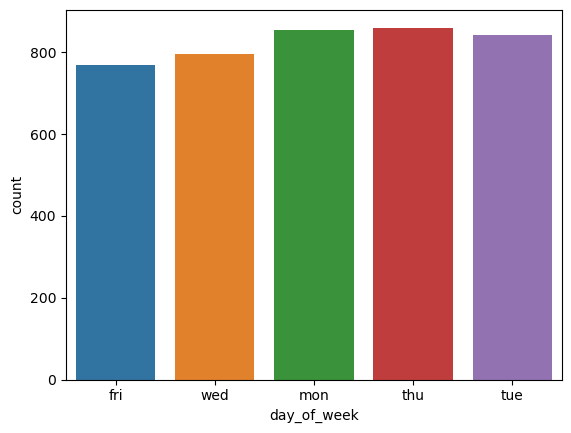

In [16]:
sns.countplot(df['day_of_week'])

<AxesSubplot:xlabel='campaign', ylabel='count'>

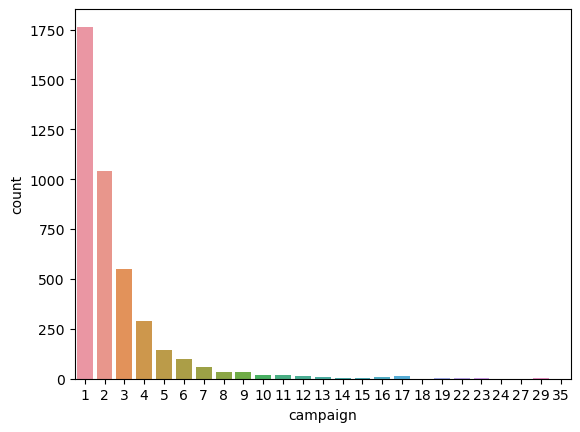

In [17]:
sns.countplot(df['campaign'])

# Data Preprocessing and Feature Engineering

In [219]:
df.rename(columns={'y': 'bank term deposit'}, inplace=True)

In [220]:
df = df[df['housing'] != 'unknown']
df.head()

age          job  marital          education default housing loan  \
0   30  blue-collar  married           basic.9y      no     yes   no   
1   39     services   single        high.school      no      no   no   
2   25     services  married        high.school      no     yes   no   
4   47       admin.  married  university.degree      no     yes   no   
5   32     services   single  university.degree      no      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   
5   cellular   sep         thu  ...         3    999         2      failure   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0         -1.8         92893.0          -46.2     1313.0       5099.1   
1          1.1         93994.0          -36.4     4855.0       5191.0   
2          1.4         94465.0          -41.8     4962.0       5228.1   
4         -0.1            93.2          -42.0     4191.0       5195.8   
5         -1.1         94199.0          -37.5      884.0       4963.6   

   bank term deposit  
0                 no  
1                 no  
2                 no  
4                 no  
5                 no  

[5 rows x 21 columns]

In [221]:
# encoding values using dict
housing_dict = {'no': 0, 'yes': 1}
default_value = -1

df['housing'] = df['housing'].apply(lambda x: housing_dict.get(x, default_value))
df.head()

age          job  marital          education default  housing loan  \
0   30  blue-collar  married           basic.9y      no        1   no   
1   39     services   single        high.school      no        0   no   
2   25     services  married        high.school      no        1   no   
4   47       admin.  married  university.degree      no        1   no   
5   32     services   single  university.degree      no        0   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   
5   cellular   sep         thu  ...         3    999         2      failure   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0         -1.8         92893.0          -46.2     1313.0       5099.1   
1          1.1         93994.0          -36.4     4855.0       5191.0   
2          1.4         94465.0          -41.8     4962.0       5228.1   
4         -0.1            93.2          -42.0     4191.0       5195.8   
5         -1.1         94199.0          -37.5      884.0       4963.6   

   bank term deposit  
0                 no  
1                 no  
2                 no  
4                 no  
5                 no  

[5 rows x 21 columns]

In [222]:
df = df[df['marital'] != 'unknown']
df.head()

age          job  marital          education default  housing loan  \
0   30  blue-collar  married           basic.9y      no        1   no   
1   39     services   single        high.school      no        0   no   
2   25     services  married        high.school      no        1   no   
4   47       admin.  married  university.degree      no        1   no   
5   32     services   single  university.degree      no        0   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   
5   cellular   sep         thu  ...         3    999         2      failure   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0         -1.8         92893.0          -46.2     1313.0       5099.1   
1          1.1         93994.0          -36.4     4855.0       5191.0   
2          1.4         94465.0          -41.8     4962.0       5228.1   
4         -0.1            93.2          -42.0     4191.0       5195.8   
5         -1.1         94199.0          -37.5      884.0       4963.6   

   bank term deposit  
0                 no  
1                 no  
2                 no  
4                 no  
5                 no  

[5 rows x 21 columns]

In [223]:
# encoding values using dict
marital_dict = {'married': 0, 'single': 1}
default_value = -1

df['marital'] = df['marital'].apply(lambda x: marital_dict.get(x, default_value))
df.head()

age          job  marital          education default  housing loan  \
0   30  blue-collar        0           basic.9y      no        1   no   
1   39     services        1        high.school      no        0   no   
2   25     services        0        high.school      no        1   no   
4   47       admin.        0  university.degree      no        1   no   
5   32     services        1  university.degree      no        0   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   
5   cellular   sep         thu  ...         3    999         2      failure   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0         -1.8         92893.0          -46.2     1313.0       5099.1   
1          1.1         93994.0          -36.4     4855.0       5191.0   
2          1.4         94465.0          -41.8     4962.0       5228.1   
4         -0.1            93.2          -42.0     4191.0       5195.8   
5         -1.1         94199.0          -37.5      884.0       4963.6   

   bank term deposit  
0                 no  
1                 no  
2                 no  
4                 no  
5                 no  

[5 rows x 21 columns]

In [224]:
df = df[
    (df['job'] != 'unknown') &
    (df['education'] != 'unknown') &
    (df['contact'] != 'unknown') &
    (df['month'] != 'unknown') &
    (df['day_of_week'] != 'unknown') &
    (df['poutcome'] != 'unknown')
]

df.head()

age          job  marital          education default  housing loan  \
0   30  blue-collar        0           basic.9y      no        1   no   
1   39     services        1        high.school      no        0   no   
2   25     services        0        high.school      no        1   no   
4   47       admin.        0  university.degree      no        1   no   
5   32     services        1  university.degree      no        0   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   
5   cellular   sep         thu  ...         3    999         2      failure   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0         -1.8         92893.0          -46.2     1313.0       5099.1   
1          1.1         93994.0          -36.4     4855.0       5191.0   
2          1.4         94465.0          -41.8     4962.0       5228.1   
4         -0.1            93.2          -42.0     4191.0       5195.8   
5         -1.1         94199.0          -37.5      884.0       4963.6   

   bank term deposit  
0                 no  
1                 no  
2                 no  
4                 no  
5                 no  

[5 rows x 21 columns]

In [225]:
# to improve the metric use one hot encoding
# label encoding
cols = ['job','education','contact','month','day_of_week','poutcome']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

age  job  marital  education default  housing loan  contact  month  \
0   30    1        0          2      no        1   no        0      6   
1   39    7        1          3      no        0   no        1      6   
2   25    7        0          3      no        1   no        1      4   
4   47    0        0          6      no        1   no        0      7   
5   32    7        1          6      no        0   no        0      9   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         2    999         0         1          -1.8   
1            0  ...         4    999         0         1           1.1   
2            4  ...         1    999         0         1           1.4   
4            1  ...         1    999         0         1          -0.1   
5            2  ...         3    999         2         0          -1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  bank term deposit  
0         92893.0          -46.2     1313.0       5099.1                 no  
1         93994.0          -36.4     4855.0       5191.0                 no  
2         94465.0          -41.8     4962.0       5228.1                 no  
4            93.2          -42.0     4191.0       5195.8                 no  
5         94199.0          -37.5      884.0       4963.6                 no  

[5 rows x 21 columns]

In [226]:
df = df[df['default'] != 'unknown']
df.head()

age  job  marital  education default  housing loan  contact  month  \
0   30    1        0          2      no        1   no        0      6   
1   39    7        1          3      no        0   no        1      6   
2   25    7        0          3      no        1   no        1      4   
4   47    0        0          6      no        1   no        0      7   
5   32    7        1          6      no        0   no        0      9   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         2    999         0         1          -1.8   
1            0  ...         4    999         0         1           1.1   
2            4  ...         1    999         0         1           1.4   
4            1  ...         1    999         0         1          -0.1   
5            2  ...         3    999         2         0          -1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  bank term deposit  
0         92893.0          -46.2     1313.0       5099.1                 no  
1         93994.0          -36.4     4855.0       5191.0                 no  
2         94465.0          -41.8     4962.0       5228.1                 no  
4            93.2          -42.0     4191.0       5195.8                 no  
5         94199.0          -37.5      884.0       4963.6                 no  

[5 rows x 21 columns]

In [227]:
# encoding values using dict
default_dict = {'no': 0, 'yes': 1}
default_value = -1

df['default'] = df['default'].apply(lambda x: default_dict.get(x, default_value))
df.head()

age  job  marital  education  default  housing loan  contact  month  \
0   30    1        0          2        0        1   no        0      6   
1   39    7        1          3        0        0   no        1      6   
2   25    7        0          3        0        1   no        1      4   
4   47    0        0          6        0        1   no        0      7   
5   32    7        1          6        0        0   no        0      9   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         2    999         0         1          -1.8   
1            0  ...         4    999         0         1           1.1   
2            4  ...         1    999         0         1           1.4   
4            1  ...         1    999         0         1          -0.1   
5            2  ...         3    999         2         0          -1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  bank term deposit  
0         92893.0          -46.2     1313.0       5099.1                 no  
1         93994.0          -36.4     4855.0       5191.0                 no  
2         94465.0          -41.8     4962.0       5228.1                 no  
4            93.2          -42.0     4191.0       5195.8                 no  
5         94199.0          -37.5      884.0       4963.6                 no  

[5 rows x 21 columns]

In [228]:
df = df[df['loan'] != 'unknown']
df.head()

age  job  marital  education  default  housing loan  contact  month  \
0   30    1        0          2        0        1   no        0      6   
1   39    7        1          3        0        0   no        1      6   
2   25    7        0          3        0        1   no        1      4   
4   47    0        0          6        0        1   no        0      7   
5   32    7        1          6        0        0   no        0      9   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         2    999         0         1          -1.8   
1            0  ...         4    999         0         1           1.1   
2            4  ...         1    999         0         1           1.4   
4            1  ...         1    999         0         1          -0.1   
5            2  ...         3    999         2         0          -1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  bank term deposit  
0         92893.0          -46.2     1313.0       5099.1                 no  
1         93994.0          -36.4     4855.0       5191.0                 no  
2         94465.0          -41.8     4962.0       5228.1                 no  
4            93.2          -42.0     4191.0       5195.8                 no  
5         94199.0          -37.5      884.0       4963.6                 no  

[5 rows x 21 columns]

In [229]:
# encoding values using dict
loan_dict = {'no': 0, 'yes': 1}
default_value = -1

df['loan'] = df['loan'].apply(lambda x: loan_dict.get(x, default_value))
df.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   30    1        0          2        0        1     0        0      6   
1   39    7        1          3        0        0     0        1      6   
2   25    7        0          3        0        1     0        1      4   
4   47    0        0          6        0        1     0        0      7   
5   32    7        1          6        0        0     0        0      9   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         2    999         0         1          -1.8   
1            0  ...         4    999         0         1           1.1   
2            4  ...         1    999         0         1           1.4   
4            1  ...         1    999         0         1          -0.1   
5            2  ...         3    999         2         0          -1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  bank term deposit  
0         92893.0          -46.2     1313.0       5099.1                 no  
1         93994.0          -36.4     4855.0       5191.0                 no  
2         94465.0          -41.8     4962.0       5228.1                 no  
4            93.2          -42.0     4191.0       5195.8                 no  
5         94199.0          -37.5      884.0       4963.6                 no  

[5 rows x 21 columns]

In [230]:
df = df[df['bank term deposit'] != 'unknown']
df.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   30    1        0          2        0        1     0        0      6   
1   39    7        1          3        0        0     0        1      6   
2   25    7        0          3        0        1     0        1      4   
4   47    0        0          6        0        1     0        0      7   
5   32    7        1          6        0        0     0        0      9   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         2    999         0         1          -1.8   
1            0  ...         4    999         0         1           1.1   
2            4  ...         1    999         0         1           1.4   
4            1  ...         1    999         0         1          -0.1   
5            2  ...         3    999         2         0          -1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  bank term deposit  
0         92893.0          -46.2     1313.0       5099.1                 no  
1         93994.0          -36.4     4855.0       5191.0                 no  
2         94465.0          -41.8     4962.0       5228.1                 no  
4            93.2          -42.0     4191.0       5195.8                 no  
5         94199.0          -37.5      884.0       4963.6                 no  

[5 rows x 21 columns]

In [231]:
# encoding values using dict
y_dict = {'no':0, 'yes':1}
df['bank term deposit'] = df['bank term deposit'].apply(lambda x: y_dict.get(x, default_value))
df.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   30    1        0          2        0        1     0        0      6   
1   39    7        1          3        0        0     0        1      6   
2   25    7        0          3        0        1     0        1      4   
4   47    0        0          6        0        1     0        0      7   
5   32    7        1          6        0        0     0        0      9   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         2    999         0         1          -1.8   
1            0  ...         4    999         0         1           1.1   
2            4  ...         1    999         0         1           1.4   
4            1  ...         1    999         0         1          -0.1   
5            2  ...         3    999         2         0          -1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  bank term deposit  
0         92893.0          -46.2     1313.0       5099.1                  0  
1         93994.0          -36.4     4855.0       5191.0                  0  
2         94465.0          -41.8     4962.0       5228.1                  0  
4            93.2          -42.0     4191.0       5195.8                  0  
5         94199.0          -37.5      884.0       4963.6                  0  

[5 rows x 21 columns]

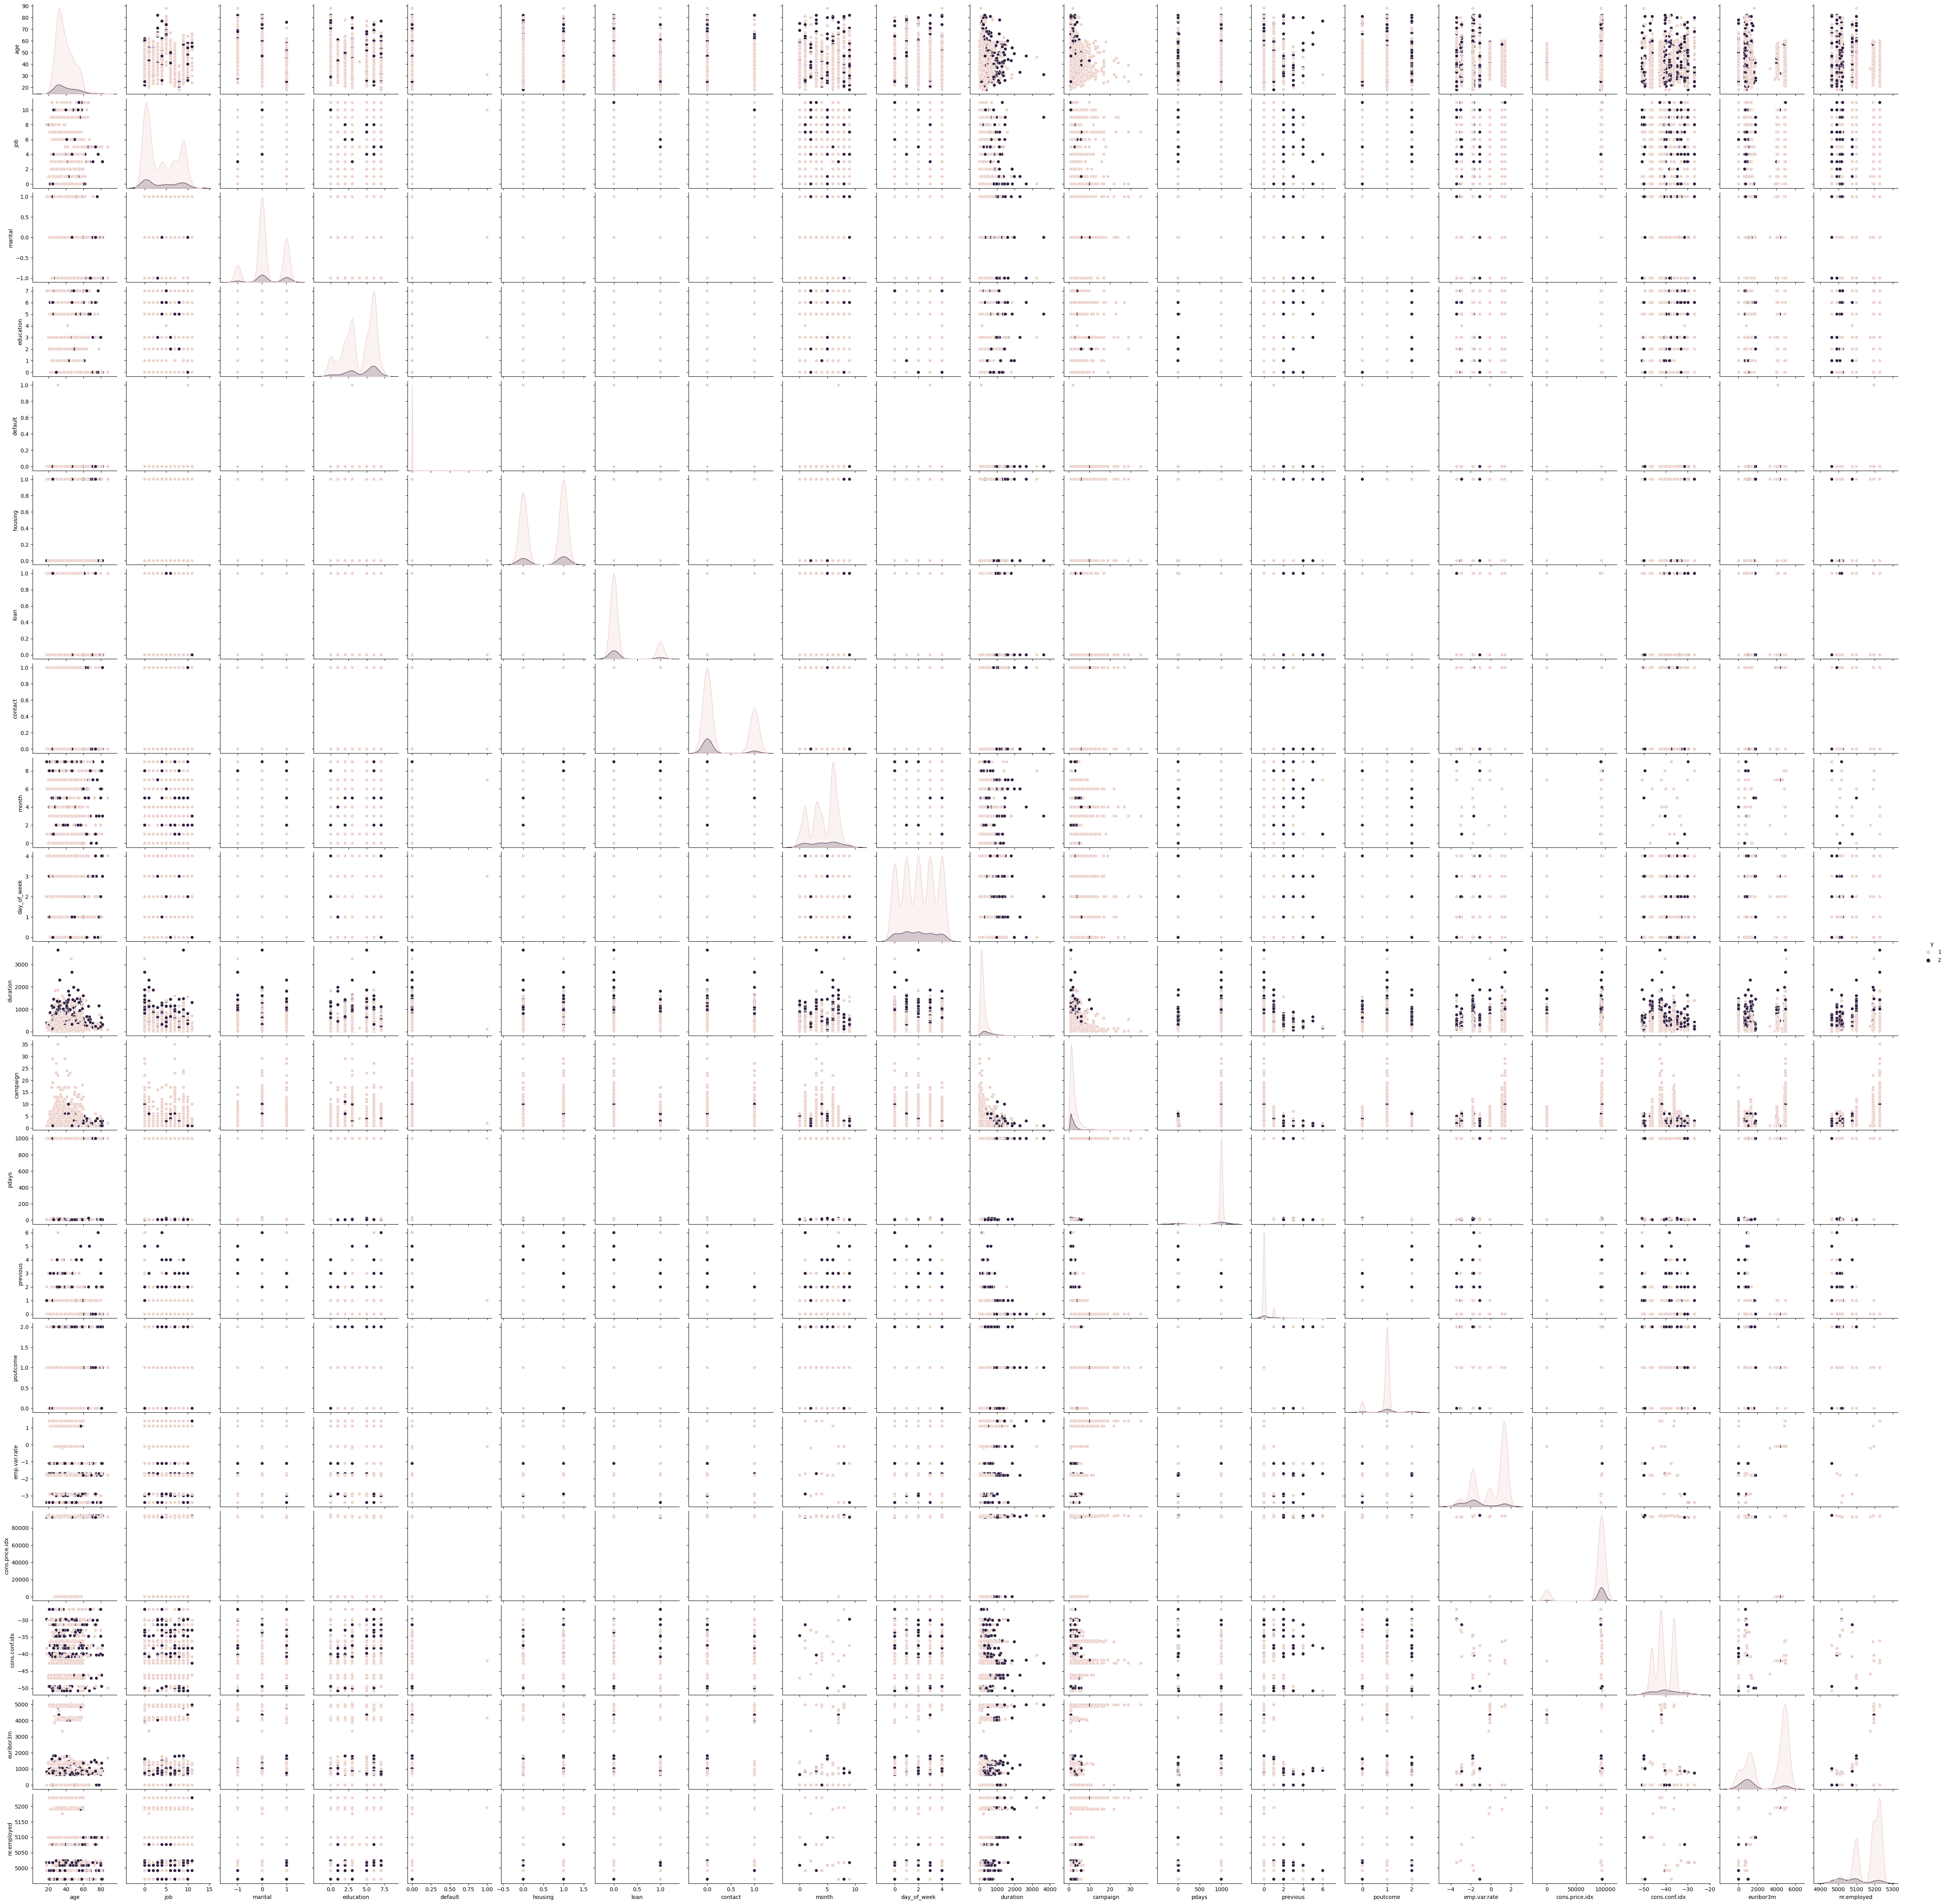

In [28]:
sns.pairplot(df , vars=["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week",
                         "duration", "campaign", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx",
                         "cons.conf.idx", "euribor3m", "nr.employed"], hue="bank term deposit")
plt.show()

# Handling outliers

In [213]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
outlier_rows = ((df < lower_bound) | (df > Upper_bound)).any(axis=1)
df_no_outliers = df[~outlier_rows]
num_outliers = sum(outlier_rows)
print(f"Number of outliers removed: {num_outliers}")

Number of outliers removed: 1533


# Coorelation Matrix

<AxesSubplot:>

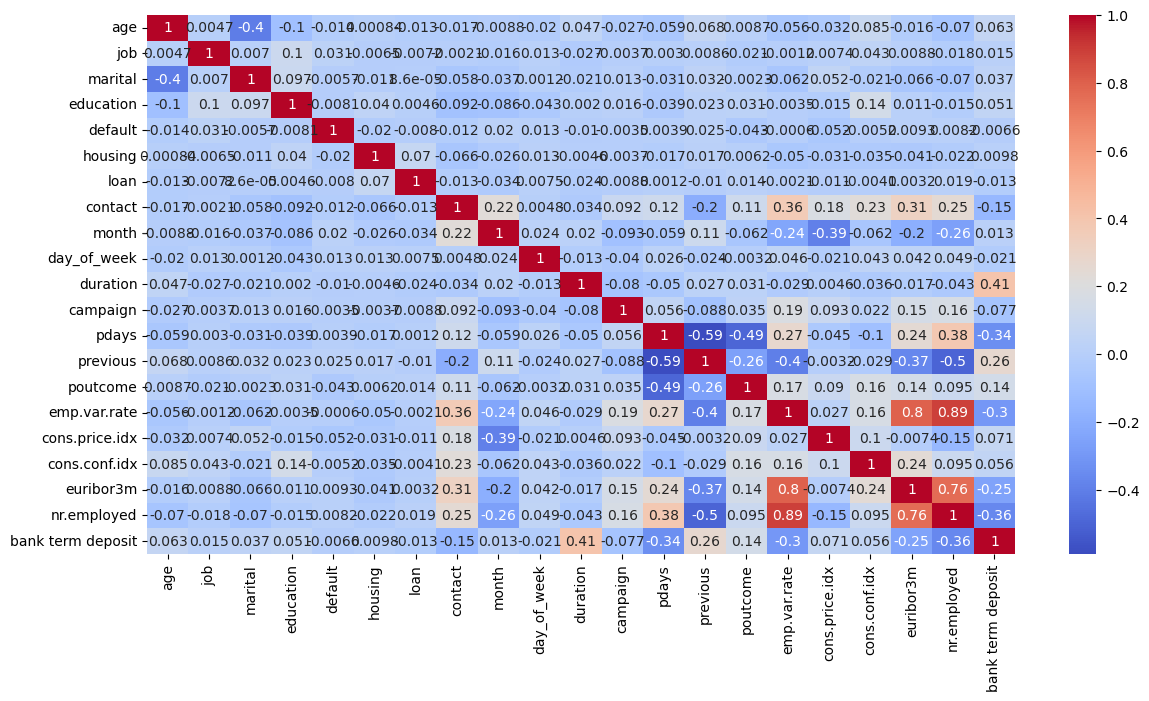

In [144]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [240]:
df.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   30    1        0          2        0        1     0        0      6   
1   39    7        1          3        0        0     0        1      6   
2   25    7        0          3        0        1     0        1      4   
4   47    0        0          6        0        1     0        0      7   
5   32    7        1          6        0        0     0        0      9   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         2    999         0         1          -1.8   
1            0  ...         4    999         0         1           1.1   
2            4  ...         1    999         0         1           1.4   
4            1  ...         1    999         0         1          -0.1   
5            2  ...         3    999         2         0          -1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  bank term deposit  
0         92893.0          -46.2     1313.0       5099.1                  0  
1         93994.0          -36.4     4855.0       5191.0                  0  
2         94465.0          -41.8     4962.0       5228.1                  0  
4            93.2          -42.0     4191.0       5195.8                  0  
5         94199.0          -37.5      884.0       4963.6                  0  

[5 rows x 21 columns]

# Feature scaling/Normalization

In [241]:
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [242]:
X

age  job  marital  education  default  housing  loan     month  \
0     0.147059  0.1      0.5   0.333333      0.0      1.0   0.0  0.666667   
1     0.279412  0.7      1.0   0.500000      0.0      0.0   0.0  0.666667   
2     0.073529  0.7      0.5   0.500000      0.0      1.0   0.0  0.444444   
4     0.397059  0.0      0.5   1.000000      0.0      1.0   0.0  0.777778   
5     0.176471  0.7      1.0   1.000000      0.0      0.0   0.0  1.000000   
...        ...  ...      ...        ...      ...      ...   ...       ...   
4114  0.147059  0.0      0.5   0.166667      0.0      1.0   1.0  0.333333   
4115  0.279412  0.0      0.5   0.500000      0.0      1.0   0.0  0.333333   
4116  0.102941  0.8      1.0   0.500000      0.0      0.0   0.0  0.666667   
4117  0.558824  0.0      0.5   0.500000      0.0      0.0   0.0  0.111111   
4118  0.205882  0.4      1.0   0.500000      0.0      1.0   0.0  0.777778   

      day_of_week  duration  campaign  previous  poutcome  
0            0.00  0.133681  0.029412  0.000000       0.5  
1            0.00  0.094977  0.088235  0.000000       0.5  
2            1.00  0.062311  0.000000  0.000000       0.5  
4            0.25  0.015921  0.000000  0.000000       0.5  
5            0.50  0.035136  0.058824  0.333333       0.0  
...           ...       ...       ...       ...       ...  
4114         0.50  0.014548  0.000000  0.000000       0.5  
4115         0.00  0.060115  0.000000  0.000000       0.5  
4116         0.25  0.017568  0.029412  0.166667       0.0  
4117         0.00  0.144935  0.000000  0.000000       0.5  
4118         1.00  0.048037  0.000000  0.000000       0.5  

[3090 rows x 13 columns]

In [243]:
# drop y
y = df['bank term deposit']


In [245]:
y

0       0
1       0
2       0
4       0
5       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: bank term deposit, Length: 3090, dtype: int64

In [244]:
# drop nr.employed, cons.price.idx, cons.conf.idx, euribor3m, emp.var.rate, pdays, contact
X = df.drop(columns=['bank term deposit','nr.employed',"cons.price.idx","cons.conf.idx", "euribor3m","emp.var.rate","pdays","contact"])
X

age  job  marital  education  default  housing  loan  month  \
0      30    1        0          2        0        1     0      6   
1      39    7        1          3        0        0     0      6   
2      25    7        0          3        0        1     0      4   
4      47    0        0          6        0        1     0      7   
5      32    7        1          6        0        0     0      9   
...   ...  ...      ...        ...      ...      ...   ...    ...   
4114   30    0        0          1        0        1     1      3   
4115   39    0        0          3        0        1     0      3   
4116   27    8        1          3        0        0     0      6   
4117   58    0        0          3        0        0     0      1   
4118   34    4        1          3        0        1     0      7   

      day_of_week  duration  campaign  previous  poutcome  
0               0       487         2         0         1  
1               0       346         4         0         1  
2               4       227         1         0         1  
4               1        58         1         0         1  
5               2       128         3         2         0  
...           ...       ...       ...       ...       ...  
4114            2        53         1         0         1  
4115            0       219         1         0         1  
4116            1        64         2         1         0  
4117            0       528         1         0         1  
4118            4       175         1         0         1  

[3090 rows x 13 columns]

# Model Selection

# Logistic Regression

In [248]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the ElasticNetCV model
elastic_net_cv = ElasticNetCV(cv=5, random_state=42)

# Fit ElasticNetCV to the training data
elastic_net_cv.fit(X_train, y_train)

# Retrieve the best alpha and l1_ratio values
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_

# Create the Logistic Regression classifier with the best hyperparameters
clf = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=best_l1_ratio, C=1/best_alpha)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.825


#  Decision Tree Classifier

In [258]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.835


# Ridge Classifier

In [257]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Ridge classifier model
clf = RidgeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.84


# Extra  Trees Classifier

In [256]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Extra Trees Classifier
clf = ExtraTreesClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.865


# Random Forest Classifier

In [41]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.885


# Gradient Boosting Classifier

In [261]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting Classifier
clf = GradientBoostingClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


# Extreme Gradient Boosting (XGBoost) Classifier

In [267]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    objective='binary:logistic',
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.885


# Hyperparameter tuning

# Xgboost

In [270]:
import sys
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model and set its hyperparameters
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    objective='binary:logistic',
    random_state=42
)

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.885


# Gradient Boosting

In [263]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# GradientBoostingClassifier modelini tanımlayalım
model = GradientBoostingClassifier()

# Hyperparameter aralıklarını belirleyelim
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Grid Search yöntemini kullanarak hyperparameter tuning yapalım
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi hyperparameter değerlerini ve modeli alalım
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Test seti üzerinde tahmin yapalım
y_pred = best_model.predict(X_test)

# Modelin doğruluk değerini hesaplayalım
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Best Parameters:", best_params)

Accuracy: 0.89
Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}


# Random Forest 

In [269]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Classifier
clf = RandomForestClassifier()

# Define the parameter grid with reduced parameter values
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Perform Grid Search with reduced parameter grid
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Best Parameters:", best_params)

Accuracy: 0.875
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
